<a href="https://colab.research.google.com/github/ManasChandan/Pneumonia-Detection/blob/master/Final_Metrics_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manascbehera123","key":"19e7fe4611ac8913c29a87790be44bca"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:43<00:00, 84.0MB/s]
100% 2.29G/2.29G [00:43<00:00, 56.7MB/s]


In [ ]:
!unzip -qq -o chest-xray-pneumonia.zip

In [ ]:
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'

In [ ]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
model_path = "/content/gdrive/My Drive/IOT LAB FILES/Pneumonia-DENSENET.h5"

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model(model_path)

In [ ]:
model.summary()

In [ ]:
import cv2
import numpy as np

In [ ]:
import os

In [ ]:
normal_photos = test_path + "/NORMAL"
real_values = []
predicted_values = []
for img in os.listdir(normal_photos):
  real_values.append(0)
  path = os.path.join(normal_photos,img)
  imgnew = cv2.imread(path)
  imgnew = cv2.resize(imgnew, (224,224))
  imgnew = np.expand_dims(imgnew ,axis = 0)
  imgnew = imgnew / 255.0
  ans = model.predict(imgnew).argmax(axis=1)
  predicted_values.append(ans[0])

In [ ]:
pneumonia_photos = test_path + "/PNEUMONIA"
for img in os.listdir(pneumonia_photos):
  real_values.append(1)
  path = os.path.join(pneumonia_photos,img)
  imgnew = cv2.imread(path)
  imgnew = cv2.resize(imgnew, (224,224))
  imgnew = np.expand_dims(imgnew ,axis = 0)
  imgnew = imgnew / 255.0
  ans = model.predict(imgnew).argmax(axis=1)
  predicted_values.append(ans[0])

NameError: ignored

In [ ]:
print(len(real_values),len(predicted_values))

624 624


In [ ]:
from sklearn.metrics import classification_report , roc_curve , confusion_matrix

In [ ]:
print(classification_report(real_values , predicted_values))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       234
           1       0.91      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.92      0.92       624



In [ ]:
print(confusion_matrix(real_values,predicted_values))

[[196  38]
 [  9 381]]


In [ ]:
sensitivity = (381 / (381+9))
print(sensitivity)

0.9769230769230769


In [ ]:
specificity = (196/(196+38))
print(specificity)

0.8376068376068376


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(real_values , predicted_values)
print(r_auc)

0.9072649572649573


In [ ]:
r_fpr, r_tpr, _ = roc_curve(real_values , predicted_values)

No handles with labels found to put in legend.


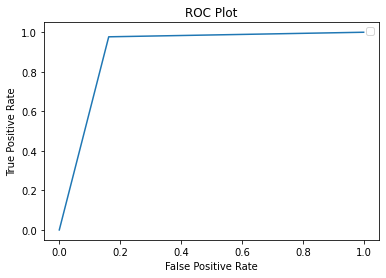

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr , r_tpr)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()